In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('C:/Users/akshi/coding/projects/dsoc/week1/creditcard.csv')

# print(data.duplicated().sum())
data = data.dropna() 


data_no_duplicates = data.drop_duplicates()

scaler = StandardScaler()

features = data_no_duplicates.drop('Class', axis=1)

data_scaled = scaler.fit_transform(features)

data_scaled = pd.DataFrame(data_scaled, columns=features.columns)

data_scaled['Class'] = data_no_duplicates['Class']


In [5]:
from imblearn.over_sampling import SMOTE

X = data_scaled.drop('Class', axis=1)
y = data_scaled['Class']


print(data_scaled['Class'].isnull().sum())
data_scaled['Class'].fillna(method='ffill', inplace=True)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, data_scaled['Class'])



0


C:\Users\akshi\AppData\Local\Temp\ipykernel_19400\3876213464.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_scaled['Class'].fillna(method='ffill', inplace=True)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(451478, 30) (112870, 30) (451478,) (112870,)


Logistic Regression
[[38265 18016]
 [25839 30750]]
              precision    recall  f1-score   support

         0.0       0.60      0.68      0.64     56281
         1.0       0.63      0.54      0.58     56589

    accuracy                           0.61    112870
   macro avg       0.61      0.61      0.61    112870
weighted avg       0.61      0.61      0.61    112870

ROC AUC Score:  0.6116418979568411


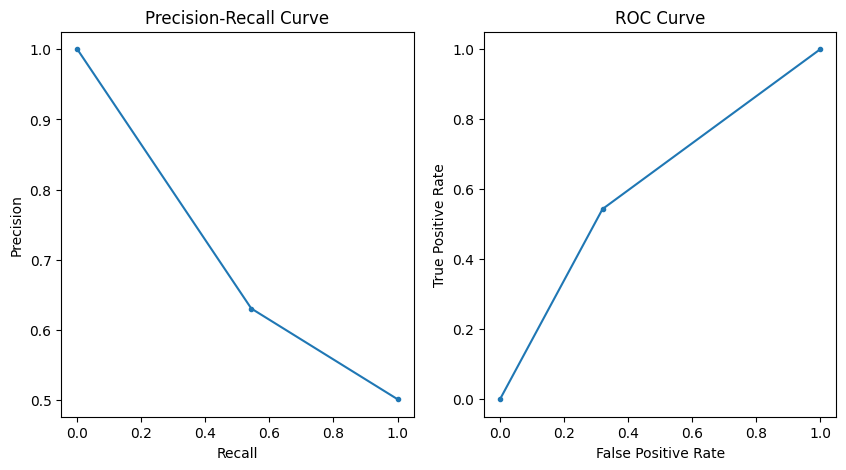

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_logreg)
roc_auc = roc_auc_score(y_test, y_pred_logreg)

print("ROC AUC Score: ", roc_auc)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_logreg)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()



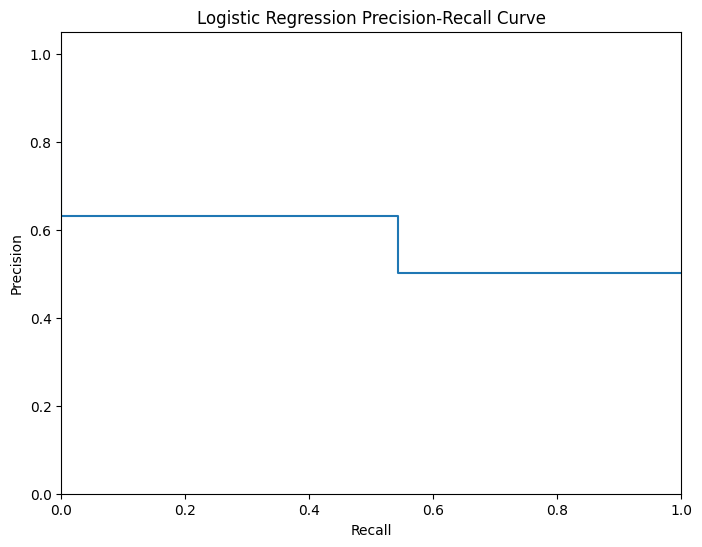

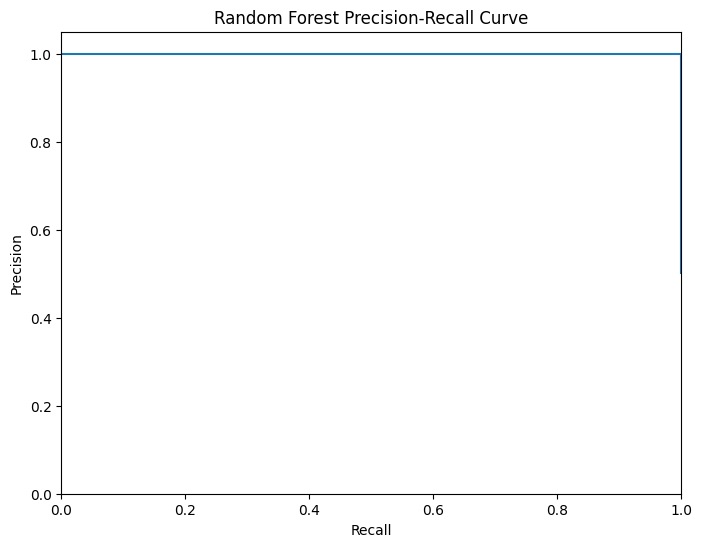

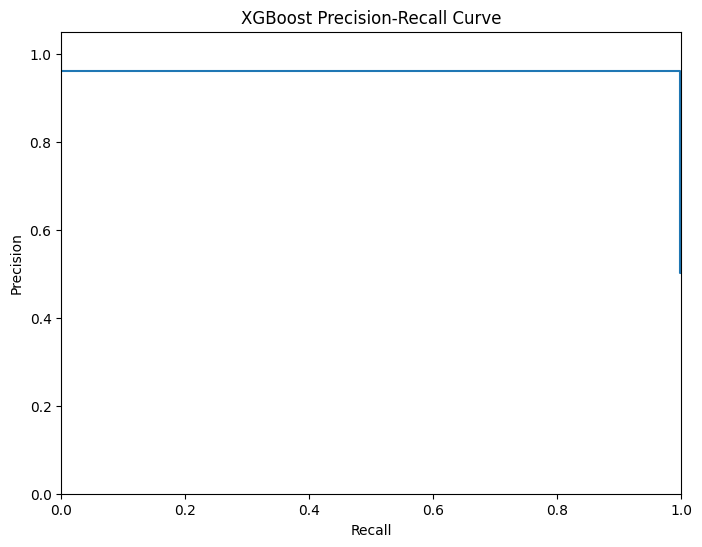

[LightGBM] [Info] Number of positive: 225585, number of negative: 225893
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 451478, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499659 -> initscore=-0.001364
[LightGBM] [Info] Start training from score -0.001364


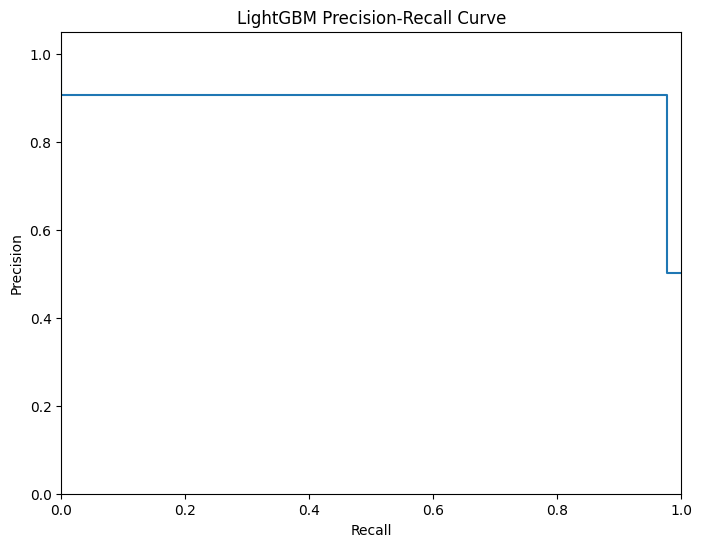

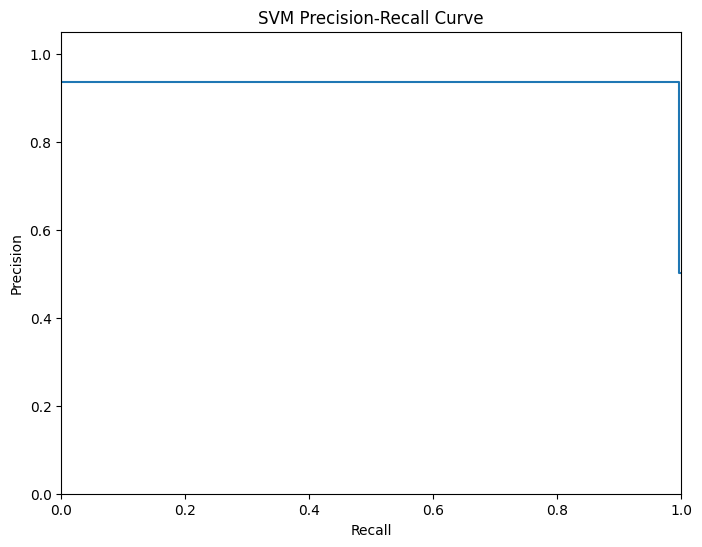

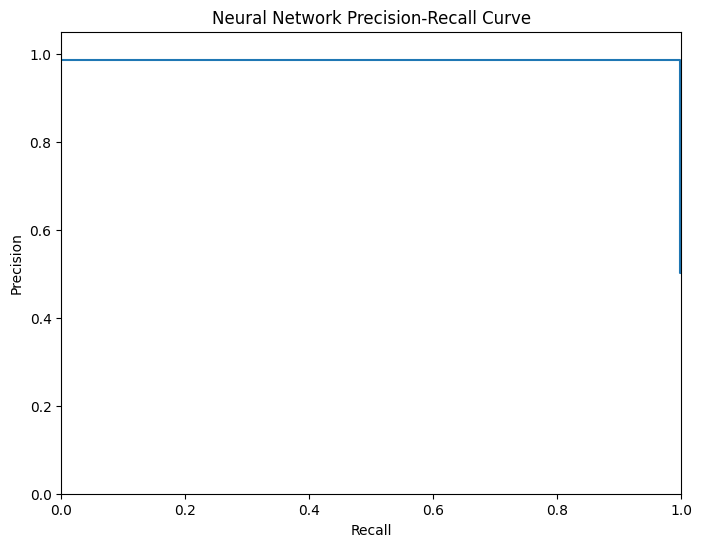

----- Logistic Regression Results -----
Accuracy: 0.6115
Precision-Recall AUC: 0.7014
ROC AUC: 0.6116
Confusion Matrix:
[[38265 18016]
 [25839 30750]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      0.68      0.64     56281
         1.0       0.63      0.54      0.58     56589

    accuracy                           0.61    112870
   macro avg       0.61      0.61      0.61    112870
weighted avg       0.61      0.61      0.61    112870



----- Random Forest Results -----
Accuracy: 0.9994
Precision-Recall AUC: 0.9994
ROC AUC: 0.9994
Confusion Matrix:
[[56218    63]
 [    9 56580]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56281
         1.0       1.00      1.00      1.00     56589

    accuracy                           1.00    112870
   macro avg       1.00      1.00      1.00    112870
weighted avg       1.00      1.00      1.00    112870





In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_auc_score, confusion_matrix, classification_report, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Neural Network': MLPClassifier(random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    results[name] = {
        'Accuracy': accuracy,
        'Precision-Recall AUC': auc(recall, precision),
        'ROC AUC': roc_auc,
        'Confusion Matrix': conf_matrix,
        'Classification Report': class_report
    }

    # Plot Precision-Recall curve
    plt.figure(figsize=(8, 6))
    plt.step(recall, precision, where='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{name} Precision-Recall Curve')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.show()

# Print results
for name, result in results.items():
    print(f"----- {name} Results -----")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Precision-Recall AUC: {result['Precision-Recall AUC']:.4f}")
    print(f"ROC AUC: {result['ROC AUC']:.4f}")
    print(f"Confusion Matrix:\n{result['Confusion Matrix']}")
    print(f"Classification Report:\n{result['Classification Report']}")
    print("\n")


In [ ]:
#done